In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as scopt
import scipy.stats as sts

# HW 6

## 1.1

Text(0.5,0,'Amazon stock price')

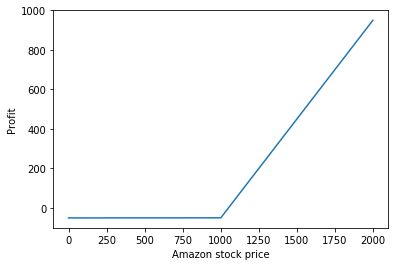

In [2]:
strike = 1000
investition = 1050

future_prices = np.linspace(0,strike*2, strike*2)

future_revenue = np.ones((strike*2)) * strike
future_revenue[future_prices>1000] = future_prices[future_prices>1000]
profit = future_revenue - investition

plt.plot(future_prices, profit)
plt.ylabel("Profit")
plt.xlabel("Amazon stock price")

## 1.2

Text(0.5,0,'Amazon stock price')

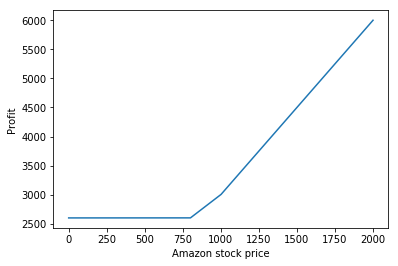

In [3]:
strike_1 = 800
strike_2 = 1000
max_ = 2000

future_prices = np.linspace(0,max_, max_)

future_revenue_1 = np.ones((max_)) * strike_1
future_revenue_1[future_prices>strike_1] = future_prices[future_prices>strike_1]


future_revenue_2 = np.ones((max_)) * strike_2
future_revenue_2[future_prices>strike_2] = future_prices[future_prices>strike_2]


profit = 2*future_revenue_1 + future_revenue_2

plt.plot(future_prices, profit)
plt.ylabel("Profit")
plt.xlabel("Amazon stock price")

## 1.3

Text(0.5,0,'Amazon stock price')

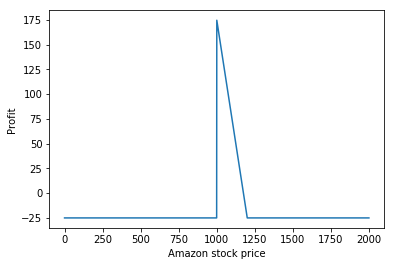

In [4]:
strike_1 = 1000
strike_2 = 1100
strike_3 = 1200

max_ = 2000

future_prices = np.linspace(0,max_, max_)

future_revenue_1 = np.zeros((max_))
future_revenue_1[future_prices>strike_1] = future_prices[future_prices>strike_1]-strike_1


future_revenue_2 = np.zeros((max_))
future_revenue_2[future_prices>strike_1] = strike_2-future_prices[future_prices>strike_1]


future_revenue_3 = np.zeros((max_))
future_revenue_3[future_prices>strike_3] = future_prices[future_prices>strike_3]-strike_3

future_revenue_2 += 14


profit = future_revenue_1 + 2*future_revenue_2 + future_revenue_3 - 53

plt.plot(future_prices, profit)
plt.ylabel("Profit")
plt.xlabel("Amazon stock price")

# Task 2

In [5]:
R = 0.0195
E = 1400
S = 1420
sig = 0.12
T = 0.25

### 2.1

In [6]:
def price_f1(S, E, R, sig, T):
    p_1 = (np.log(S/E)+(R+sig**2/2)*T ) / (sig*np.sqrt(T))
    p_2 = p_1 - sig*np.sqrt(T)
    return sts.norm.cdf(p_1)*S - sts.norm.cdf(p_2)*E*np.exp(-R*T)
print(f"Ціна за Блека-Шоулза і Мертона = {price_f1(S, E, R, sig, T)}")

Ціна за Блека-Шоулза і Мертона = 48.75195617984207


### 2.4

In [8]:
def f(x):
    return 40 - price_f1(S, E, R, x, T)
volat = scopt.root(f, x0=0.1)
print(f"Вбудована волатильність Блека-Шоулза і Мертона: {volat.x[0]}")

Вбудована волатильність Блека-Шоулза і Мертона: 0.08653669289869612


## 2.5

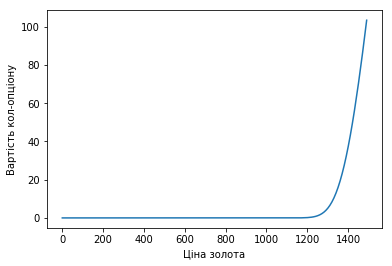

In [9]:
prices = np.arange(1, 1500, 10)
costes = [price_f1(p, E, R, sig, T) for p in prices]

plt.plot(prices, costes)

plt.xlabel("Ціна золота")
plt.ylabel("Вартість кол-опціону");

## Task 3

In [10]:
df = pd.read_excel("./data/stock_data.xlsx", usecols=[8,9,10,11,12,13,14], nrows=274)
df.head()

,RAAPL,RGOOGL,RMSFT,RAMZN,RYHOO,RNFLX,RS&P500
0,0.030980,0.027951,0.028512,0.062200,0.002516,0.045089,0.031954
1,0.052111,0.037994,0.038971,0.053645,-0.000627,0.062120,0.022613
2,-0.022054,-0.003632,0.004254,-0.024893,-0.034526,0.010787,-0.001920
3,0.003327,0.017177,-0.013477,0.016042,-0.024707,-0.035351,0.000101
4,-0.036478,0.009064,0.025761,0.044330,0.012667,-0.028003,0.013275


### 3.1

In [11]:
df_description = df.describe()
sts_describe = sts.describe(df, axis=0)
df_description.loc['skewness'] = sts_describe.skewness
df_description.loc['kurtosis'] = sts_describe.kurtosis
df_description

,RAAPL,RGOOGL,RMSFT,RAMZN,RYHOO,RNFLX,RS&P500
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,0.006240,0.003199,0.002886,0.004474,0.004996,0.011463,0.002716
std,0.039389,0.035491,0.029523,0.043304,0.041946,0.089492,0.020503
min,-0.120164,-0.129213,-0.119813,-0.115522,-0.112601,-0.281100,-0.071888
25%,-0.021591,-0.019869,-0.013545,-0.024191,-0.017359,-0.033251,-0.007115
50%,0.007366,0.003195,0.003192,0.001225,0.004049,0.007999,0.003267
75%,0.031002,0.020759,0.019176,0.030608,0.028431,0.049225,0.013794
max,0.141115,0.159888,0.092773,0.194073,0.174639,0.709791,0.073886
skewness,0.015139,0.617257,-0.214252,0.356227,0.400277,1.768206,-0.276070
kurtosis,0.229520,2.954009,1.320016,0.996591,1.455430,14.183419,1.541294


In [12]:
df.cov()

,RAAPL,RGOOGL,RMSFT,RAMZN,RYHOO,RNFLX,RS&P500
RAAPL,0.001552,0.000618,0.000345,0.000712,0.000489,0.000455,0.000440
RGOOGL,0.000618,0.001260,0.000436,0.000837,0.000435,0.000849,0.000444
RMSFT,0.000345,0.000436,0.000872,0.000475,0.000337,0.000594,0.000374
RAMZN,0.000712,0.000837,0.000475,0.001875,0.000647,0.001113,0.000542
RYHOO,0.000489,0.000435,0.000337,0.000647,0.001759,0.000751,0.000385
RNFLX,0.000455,0.000849,0.000594,0.001113,0.000751,0.008009,0.000446
RS&P500,0.000440,0.000444,0.000374,0.000542,0.000385,0.000446,0.000420


And heatmap of cor matrix:

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,RAAPL,RGOOGL,RMSFT,RAMZN,RYHOO,RNFLX,RS&P500
RAAPL,1,0.442234,0.296429,0.41729,0.29593,0.129047,0.545372
RGOOGL,0.442234,1,0.416537,0.544367,0.29215,0.267205,0.609872
RMSFT,0.296429,0.416537,1,0.371248,0.271911,0.224919,0.617533
RAMZN,0.41729,0.544367,0.371248,1,0.356277,0.287316,0.61069
RYHOO,0.29593,0.29215,0.271911,0.356277,1,0.200126,0.447161
RNFLX,0.129047,0.267205,0.224919,0.287316,0.200126,1,0.243048
RS&P500,0.545372,0.609872,0.617533,0.61069,0.447161,0.243048,1


Covarience matrix:

In [14]:
df.cov()

,RAAPL,RGOOGL,RMSFT,RAMZN,RYHOO,RNFLX,RS&P500
RAAPL,0.001552,0.000618,0.000345,0.000712,0.000489,0.000455,0.000440
RGOOGL,0.000618,0.001260,0.000436,0.000837,0.000435,0.000849,0.000444
RMSFT,0.000345,0.000436,0.000872,0.000475,0.000337,0.000594,0.000374
RAMZN,0.000712,0.000837,0.000475,0.001875,0.000647,0.001113,0.000542
RYHOO,0.000489,0.000435,0.000337,0.000647,0.001759,0.000751,0.000385
RNFLX,0.000455,0.000849,0.000594,0.001113,0.000751,0.008009,0.000446
RS&P500,0.000440,0.000444,0.000374,0.000542,0.000385,0.000446,0.000420


## 3.2

## Task 4

In [15]:
workbook = pd.ExcelFile("./data/ADJ_PRICES.xlsx")
df = pd.read_excel(workbook, 'WEEK')
df.head()

,Date,K,TRIP,FB,S&P500
0,2014-01-03,57.492762,80.919998,54.560001,1831.369995
1,2014-01-10,57.682566,86.800003,57.939999,1842.369995
2,2014-01-17,57.388367,83.900002,56.299999,1838.699951
3,2014-01-24,56.780983,80.360001,54.450001,1790.290039
4,2014-01-31,55.025259,77.190002,62.570000,1782.589966


### 4.1

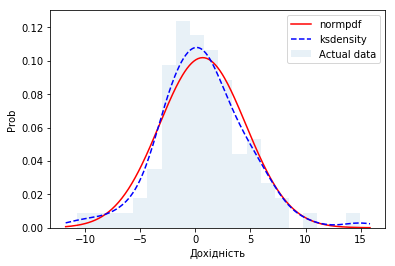

In [16]:
def ROR(name):
    row = df[name]
    return (row.iloc[1:,].values - row.iloc[:-1,].values)/row.iloc[:-1,].values*100
    
fb_ror = ROR('FB')

x = np.arange(fb_ror.min()-1, fb_ror.max()+1, .1)


actual_norm = sts.norm.pdf(x, loc=fb_ror.mean(), scale=fb_ror.std())
ksdensity = sts.gaussian_kde(fb_ror)(x)

plt.hist(fb_ror, bins=20, density=True, alpha=.1, label="Actual data")


plt.plot(x, actual_norm, 'r', label="normpdf")
plt.plot(x, ksdensity, 'b--', label="ksdensity")


plt.xlabel("Дохідність")
plt.ylabel("Prob")
plt.legend();

## 4.2

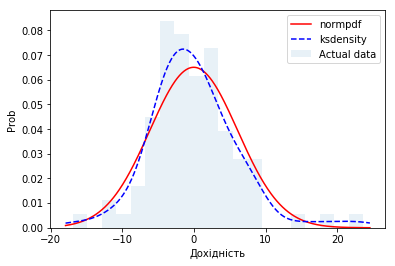

In [19]:
trip_ror = ROR('TRIP')

x = np.arange(trip_ror.min()-1, trip_ror.max()+1, .1)


norm = sts.norm.pdf(x, loc=trip_ror.mean(), scale=trip_ror.std())


s, loc, std = sts.lognorm.fit(trip_ror)
lognorm_best_fit = sts.lognorm.pdf(x, s=s, loc=loc, scale=std)
ksdensity = sts.gaussian_kde(trip_ror)(x)

plt.hist(trip_ror, bins=20, density=True, alpha=.1, label="Actual data")


plt.plot(x, norm, 'r', label="normpdf")
plt.plot(x, ksdensity, 'b--', label="ksdensity")

plt.xlabel("Дохідність")
plt.ylabel("Prob")
plt.legend()
plt.show();

### 4.3

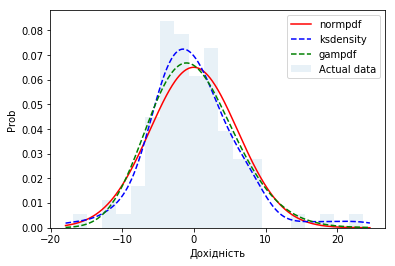

In [21]:
a, loc, scale = sts.gamma.fit(trip_ror)
gamma= sts.gamma.pdf(x, a=a, loc=loc, scale=scale)

plt.hist(trip_ror, bins=20, density=True, alpha=.1, label="Actual data")


plt.plot(x, norm, 'r', label="normpdf")
plt.plot(x, ksdensity, 'b--', label="ksdensity")

plt.plot(x, gamma, 'g--', label="gampdf")

plt.xlabel("Дохідність")
plt.ylabel("Prob")
plt.legend()
plt.show();